### Heart Disease Diagnostic Analysis

#### Problem Statement:
Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all
irrespective of any status. You are required to analyze this health and medical data for better
future preparation.


In [2]:
#importing necessary libary
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
heart_disease = pd.read_csv('Heart Disease data.csv')
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- Zero null records in the dataset
- Look's attribute types are correct and match with the records.

In [5]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### Data dictionary

1. age: Age of the patient.
2. sex: Gender of the patient (0 = Female, 1 = Male).
3. cp: The type of chest pain experienced by the patient (0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic).
4. trestbps: The patient’s resting blood pressure in mm Hg on admission to the hospital.
5. cp: Serum cholesterol level in mg/dl.
6. fbs: Fasting blood sugar level (0 = <= 120 mg/dl, 1 = > 120 mg/dl).
7. restecg: Results of resting electrocardiogram (0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy).
8. thalach:  Maximum heart rate achieved during the test.
9. exang: Exercise-induced angina (0 = No, 1 = Yes).
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: Slope of the peak exercise ST segment (0 = Upsloping, 1 = Flat, 2 = Downsloping)
12. ca: Number of major vessels colored by fluoroscopy
13. thal: Thalassemia status (0 = Normal, 1 = Fixed defect, 2 = Reversible defect).
14. target: Diagnosis of heart disease (0 = No heart disease, 1 = Heart disease).

In [6]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Duplicate check
duplicates = heart_disease.duplicated().sum()
print(f'Number of duplicates:{duplicates}')

Number of duplicates:723


In [8]:
heart_disease_clean = heart_disease[~heart_disease.duplicated()]
heart_disease_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


####  EDA

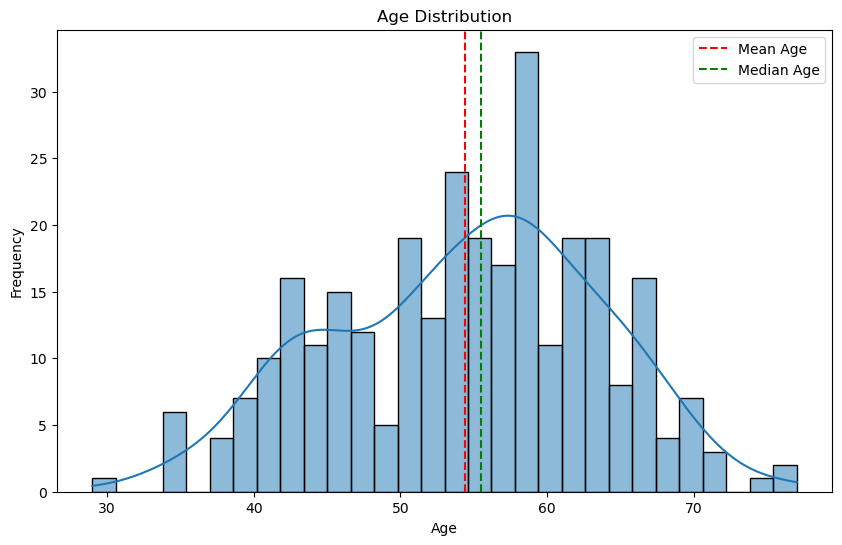

Mean Age: 54.42
Median Age: 55.50


In [9]:
# Age Distribution with Mean and Median Lines
plt.figure(figsize=(10, 6))
sns.histplot(heart_disease_clean['age'], bins=30, kde=True)
plt.axvline(heart_disease_clean['age'].mean(), color='r', linestyle='--', label='Mean Age')
plt.axvline(heart_disease_clean['age'].median(), color='g', linestyle='--', label='Median Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


mean_age = heart_disease_clean['age'].mean()
median_age = heart_disease_clean['age'].median()

# Print mean and median age
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")

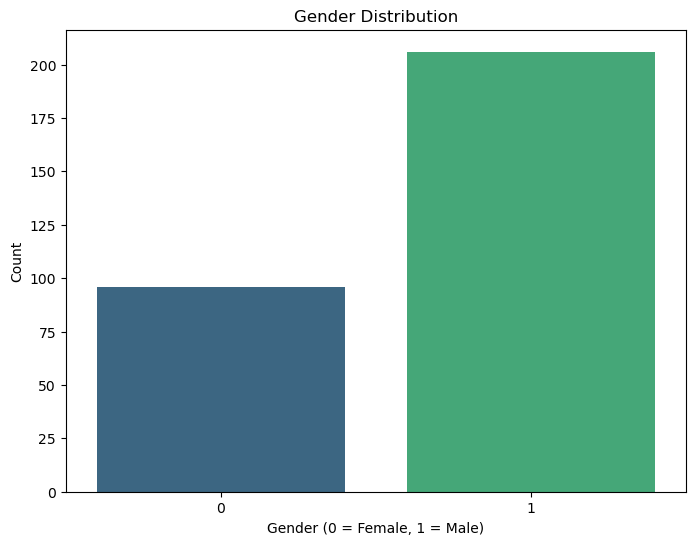

sex
1    206
0     96
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=heart_disease_clean, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

print(heart_disease_clean['sex'].value_counts())

In [11]:
heart_disease_clean['sex_col'] = heart_disease_clean['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')

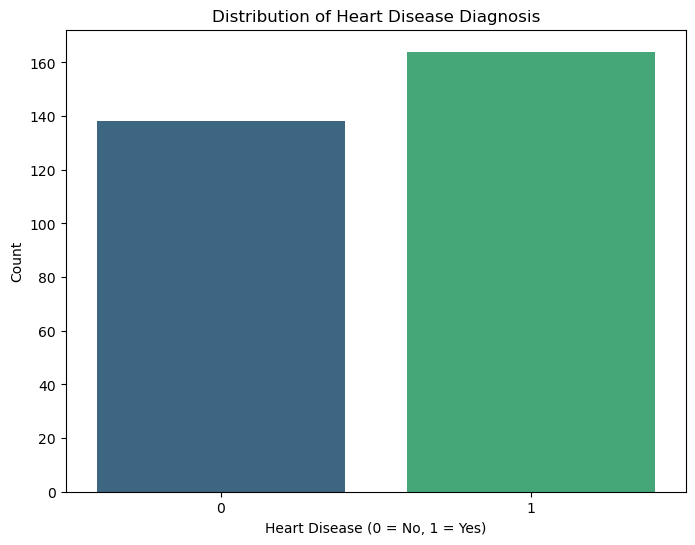

target
1    164
0    138
Name: count, dtype: int64


In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=heart_disease_clean, palette='viridis')
plt.title('Distribution of Heart Disease Diagnosis')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

print(heart_disease_clean['target'].value_counts())

In [13]:
heart_disease_clean['target_col'] =heart_disease_clean['target'].apply(lambda x:'Heart disease' if x==1 else 'No Heart disease')

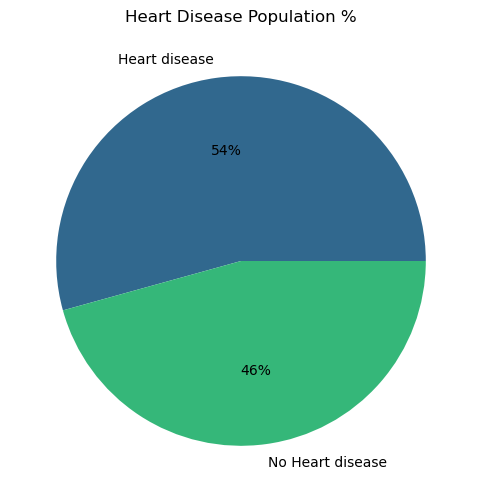

In [14]:
# Pie Chart
plt.figure(figsize=(8, 6))
sizes = heart_disease_clean['target_col'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%0.0f%%', colors=sns.color_palette('viridis', 2))
plt.title('Heart Disease Population %')
plt.show()

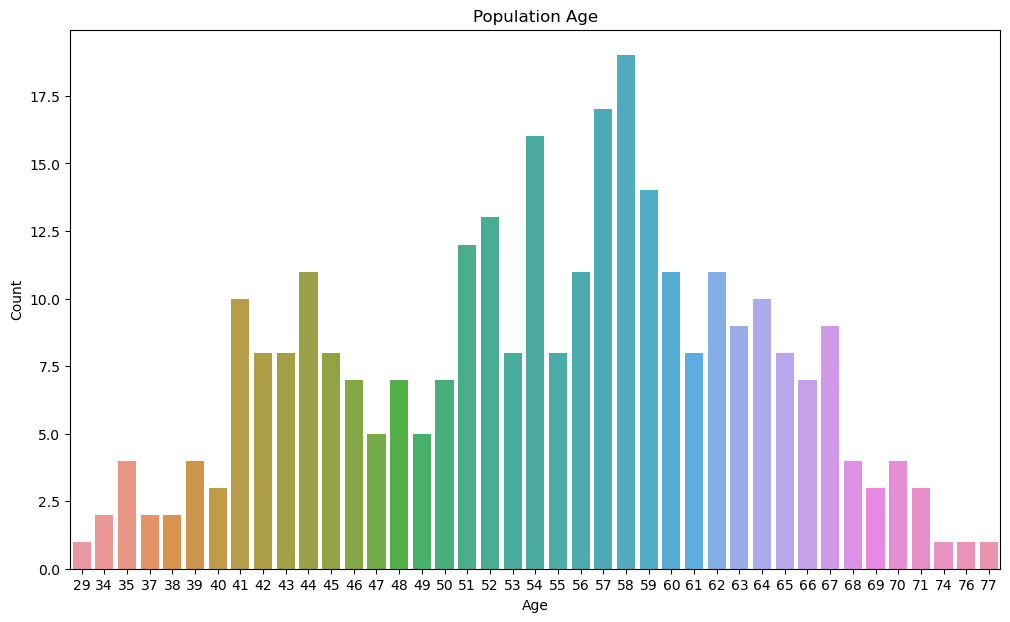

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(x='age', data=heart_disease_clean)
plt.title('Population Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [16]:
#Statistical Analysis
Min_Age=heart_disease_clean['age'].min()
Max_Age=heart_disease_clean['age'].max()
Mean_Age=heart_disease_clean['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.420529801324506


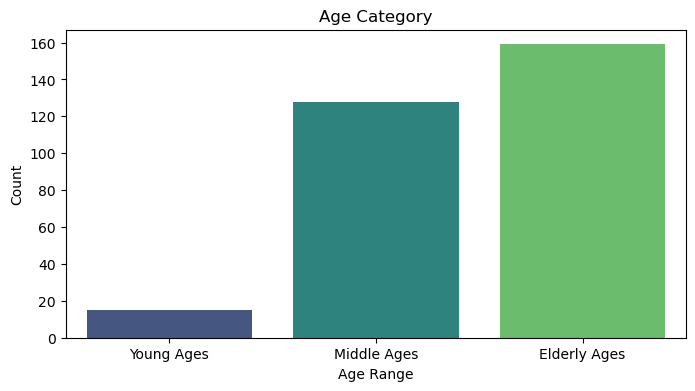

Young Ages = 15
Middle Ages = 128
Elderly Ages = 159


In [17]:
# Categorical Analysis
age_bins = [29, 40, 55, 100]  # Adjust as needed
age_labels = ['Young Ages', 'Middle Ages', 'Elderly Ages']
heart_disease_clean['age_category'] = pd.cut(heart_disease_clean['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the counts for each age category
age_category_counts = heart_disease_clean['age_category'].value_counts().reindex(age_labels)

# Bar Plot Creation of Age Category
plt.figure(figsize=(8, 4))
sns.barplot(x=age_labels, y=age_category_counts.values, palette='viridis')
plt.title('Age Category')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

# Print counts
print('Young Ages =', age_category_counts['Young Ages'])
print('Middle Ages =', age_category_counts['Middle Ages'])
print('Elderly Ages =', age_category_counts['Elderly Ages'])


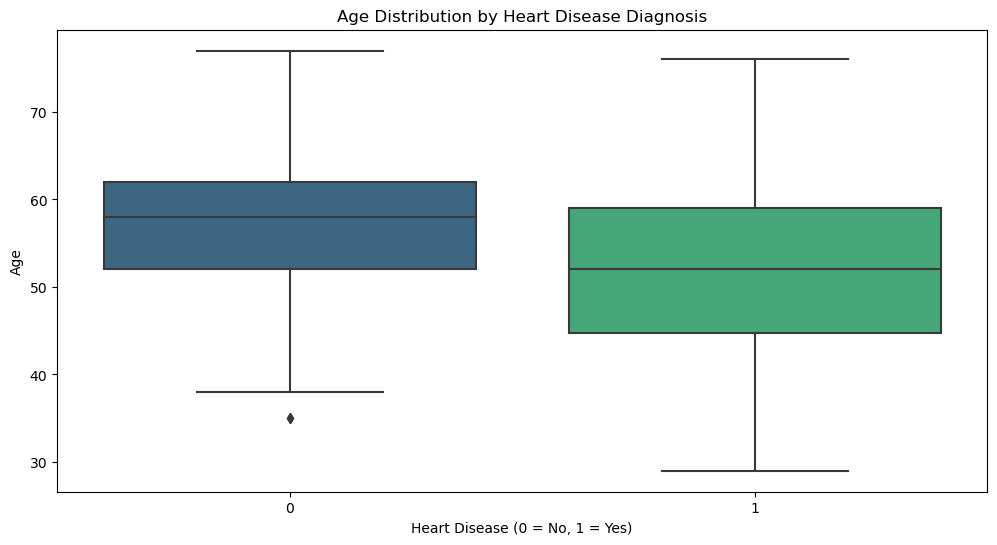

Age Distribution by Heart Disease Diagnosis:
        count       mean       std   min    25%   50%   75%   max
target                                                           
0       138.0  56.601449  7.962082  35.0  52.00  58.0  62.0  77.0
1       164.0  52.585366  9.511957  29.0  44.75  52.0  59.0  76.0


In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='age', data=heart_disease_clean, palette='viridis')
plt.title('Age Distribution by Heart Disease Diagnosis')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


# Summary statistics for age by heart disease diagnosis
age_stats = heart_disease_clean.groupby('target')['age'].describe()
print("Age Distribution by Heart Disease Diagnosis:")
print(age_stats)

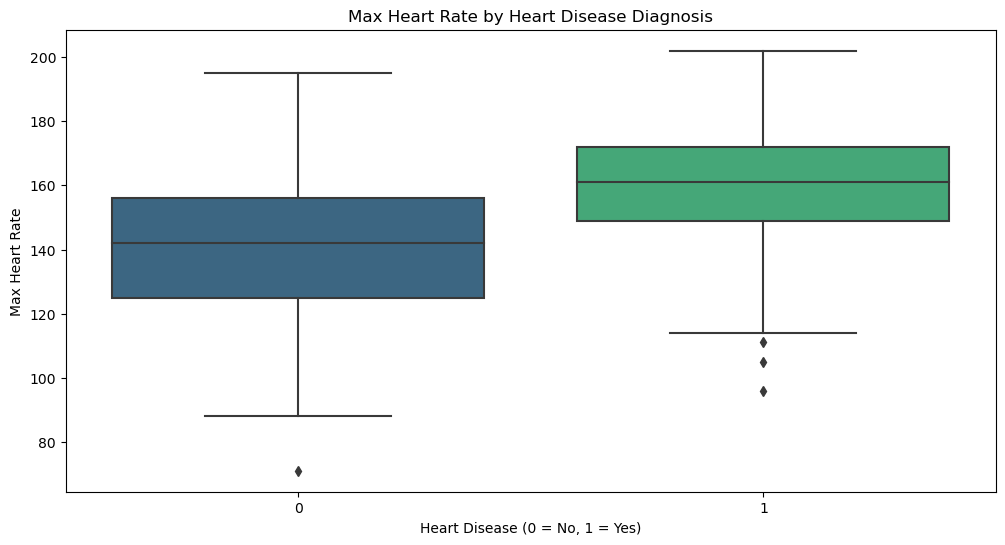

Max Heart Rate Distribution by Heart Disease Diagnosis:
        count        mean        std   min     25%    50%    75%    max
target                                                                 
0       138.0  139.101449  22.598782  71.0  125.00  142.0  156.0  195.0
1       164.0  158.378049  19.199080  96.0  148.75  161.0  172.0  202.0


In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='thalach', data=heart_disease_clean, palette='viridis')
plt.title('Max Heart Rate by Heart Disease Diagnosis')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate')
plt.show()


# Summary statistics for max heart rate by heart disease diagnosis
thalach_stats = heart_disease_clean.groupby('target')['thalach'].describe()
print("Max Heart Rate Distribution by Heart Disease Diagnosis:")
print(thalach_stats)

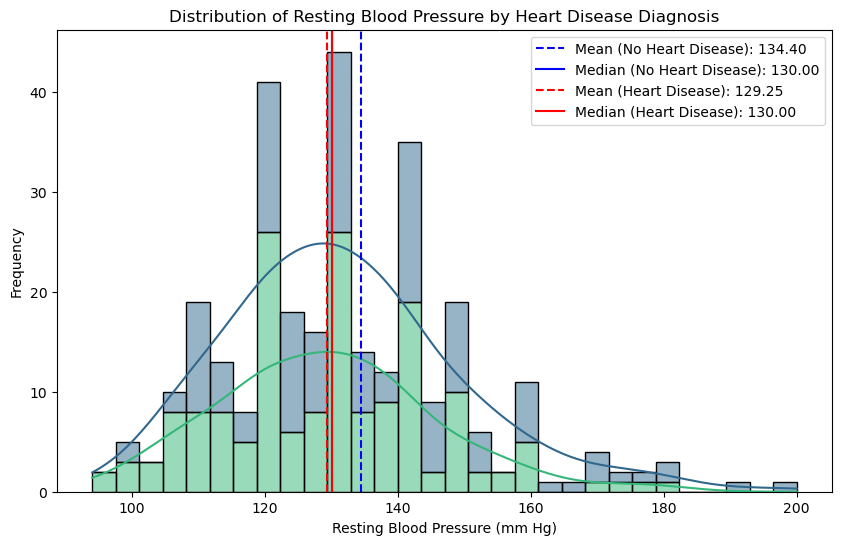

In [20]:
# Calculate mean and median for both heart disease and no heart disease groups
mean_trestbps_0 = heart_disease_clean[heart_disease_clean['target'] == 0]['trestbps'].mean()
median_trestbps_0 = heart_disease_clean[heart_disease_clean['target'] == 0]['trestbps'].median()

mean_trestbps_1 = heart_disease_clean[heart_disease_clean['target'] == 1]['trestbps'].mean()
median_trestbps_1 = heart_disease_clean[heart_disease_clean['target'] == 1]['trestbps'].median()

# Plotting the histogram with vertical lines for mean and median
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_disease_clean, x='trestbps', hue='target', multiple='stack', palette='viridis', bins=30, kde=True)
plt.axvline(mean_trestbps_0, color='blue', linestyle='--', label=f'Mean (No Heart Disease): {mean_trestbps_0:.2f}')
plt.axvline(median_trestbps_0, color='blue', linestyle='-', label=f'Median (No Heart Disease): {median_trestbps_0:.2f}')
plt.axvline(mean_trestbps_1, color='red', linestyle='--', label=f'Mean (Heart Disease): {mean_trestbps_1:.2f}')
plt.axvline(median_trestbps_1, color='red', linestyle='-', label=f'Median (Heart Disease): {median_trestbps_1:.2f}')
plt.title('Distribution of Resting Blood Pressure by Heart Disease Diagnosis')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

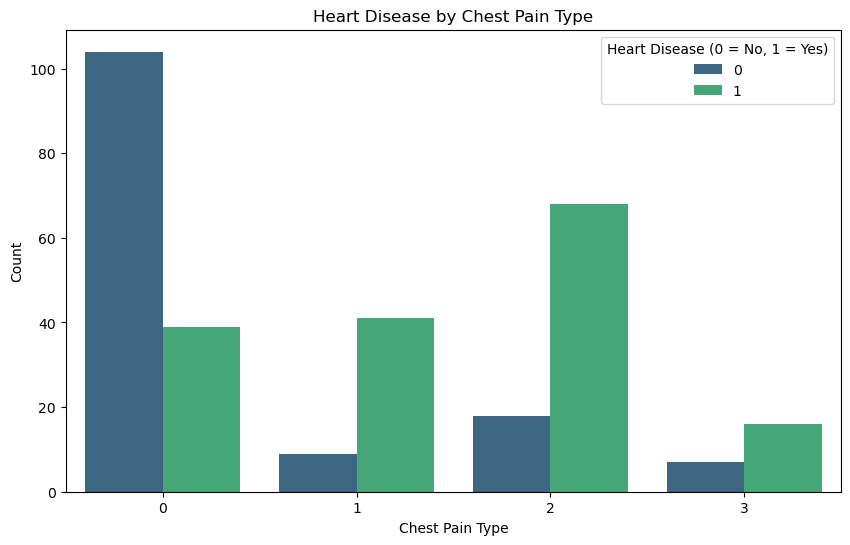

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=heart_disease_clean, palette='viridis')
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
plt.show()

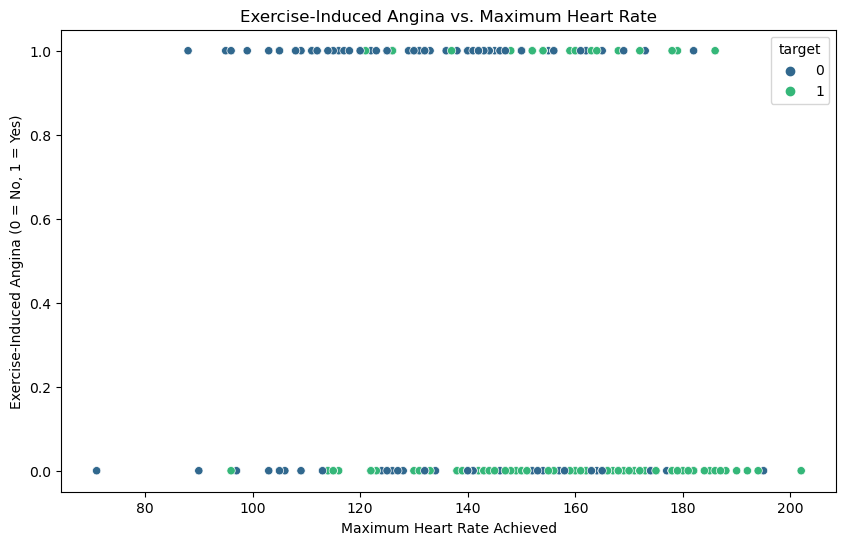

Summary Statistics for Maximum Heart Rate (thalach) by Heart Disease Diagnosis:
        count        mean        std   min     25%    50%    75%    max
target                                                                 
0       138.0  139.101449  22.598782  71.0  125.00  142.0  156.0  195.0
1       164.0  158.378049  19.199080  96.0  148.75  161.0  172.0  202.0

Proportion of Exercise-Induced Angina (exang) by Heart Disease Diagnosis:
exang          0         1
target                    
0       0.449275  0.550725
1       0.859756  0.140244


In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='thalach', y='exang', hue='target', data=heart_disease_clean, palette='viridis')
plt.title('Exercise-Induced Angina vs. Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Exercise-Induced Angina (0 = No, 1 = Yes)')
plt.show()

# Summary statistics for thalach and exang by heart disease diagnosis
thalach_summary = heart_disease_clean.groupby('target')['thalach'].describe()
exang_summary = heart_disease_clean.groupby('target')['exang'].value_counts(normalize=True).unstack().fillna(0)

# Print the summary statistics
print("Summary Statistics for Maximum Heart Rate (thalach) by Heart Disease Diagnosis:")
print(thalach_summary)
print("\nProportion of Exercise-Induced Angina (exang) by Heart Disease Diagnosis:")
print(exang_summary)

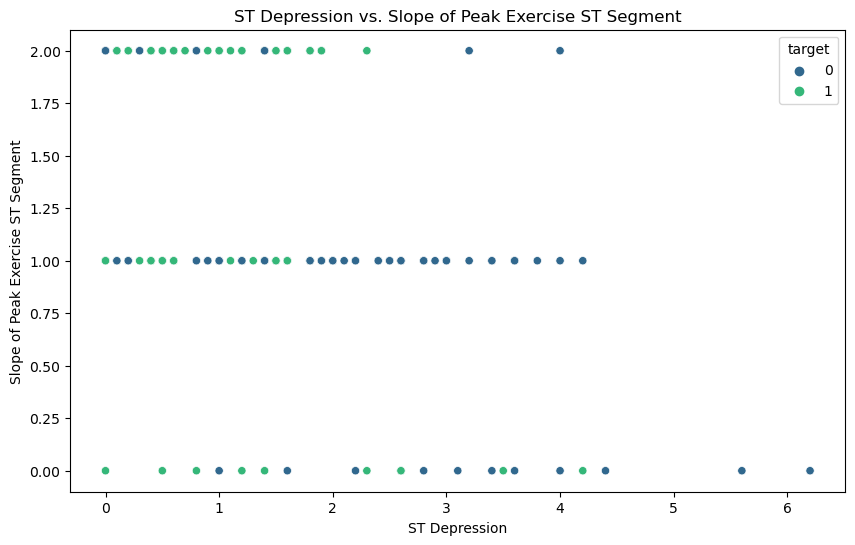

Summary Statistics for ST Depression (oldpeak) by Heart Disease Diagnosis:
        count      mean       std  min  25%  50%    75%  max
target                                                      
0       138.0  1.585507  1.300340  0.0  0.6  1.4  2.500  6.2
1       164.0  0.586585  0.781734  0.0  0.0  0.2  1.025  4.2

Proportion of Slope of Peak Exercise ST Segment (slope) by Heart Disease Diagnosis:
slope          0        1         2
target                             
0       0.086957  0.65942  0.253623
1       0.054878  0.29878  0.646341


In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldpeak', y='slope', hue='target', data=heart_disease_clean, palette='viridis')
plt.title('ST Depression vs. Slope of Peak Exercise ST Segment')
plt.xlabel('ST Depression')
plt.ylabel('Slope of Peak Exercise ST Segment')
plt.show()


# Summary statistics for oldpeak and slope by heart disease diagnosis
oldpeak_summary = heart_disease_clean.groupby('target')['oldpeak'].describe()
slope_summary = heart_disease_clean.groupby('target')['slope'].value_counts(normalize=True).unstack().fillna(0)

# Print the summary statistics
print("Summary Statistics for ST Depression (oldpeak) by Heart Disease Diagnosis:")
print(oldpeak_summary)
print("\nProportion of Slope of Peak Exercise ST Segment (slope) by Heart Disease Diagnosis:")
print(slope_summary)

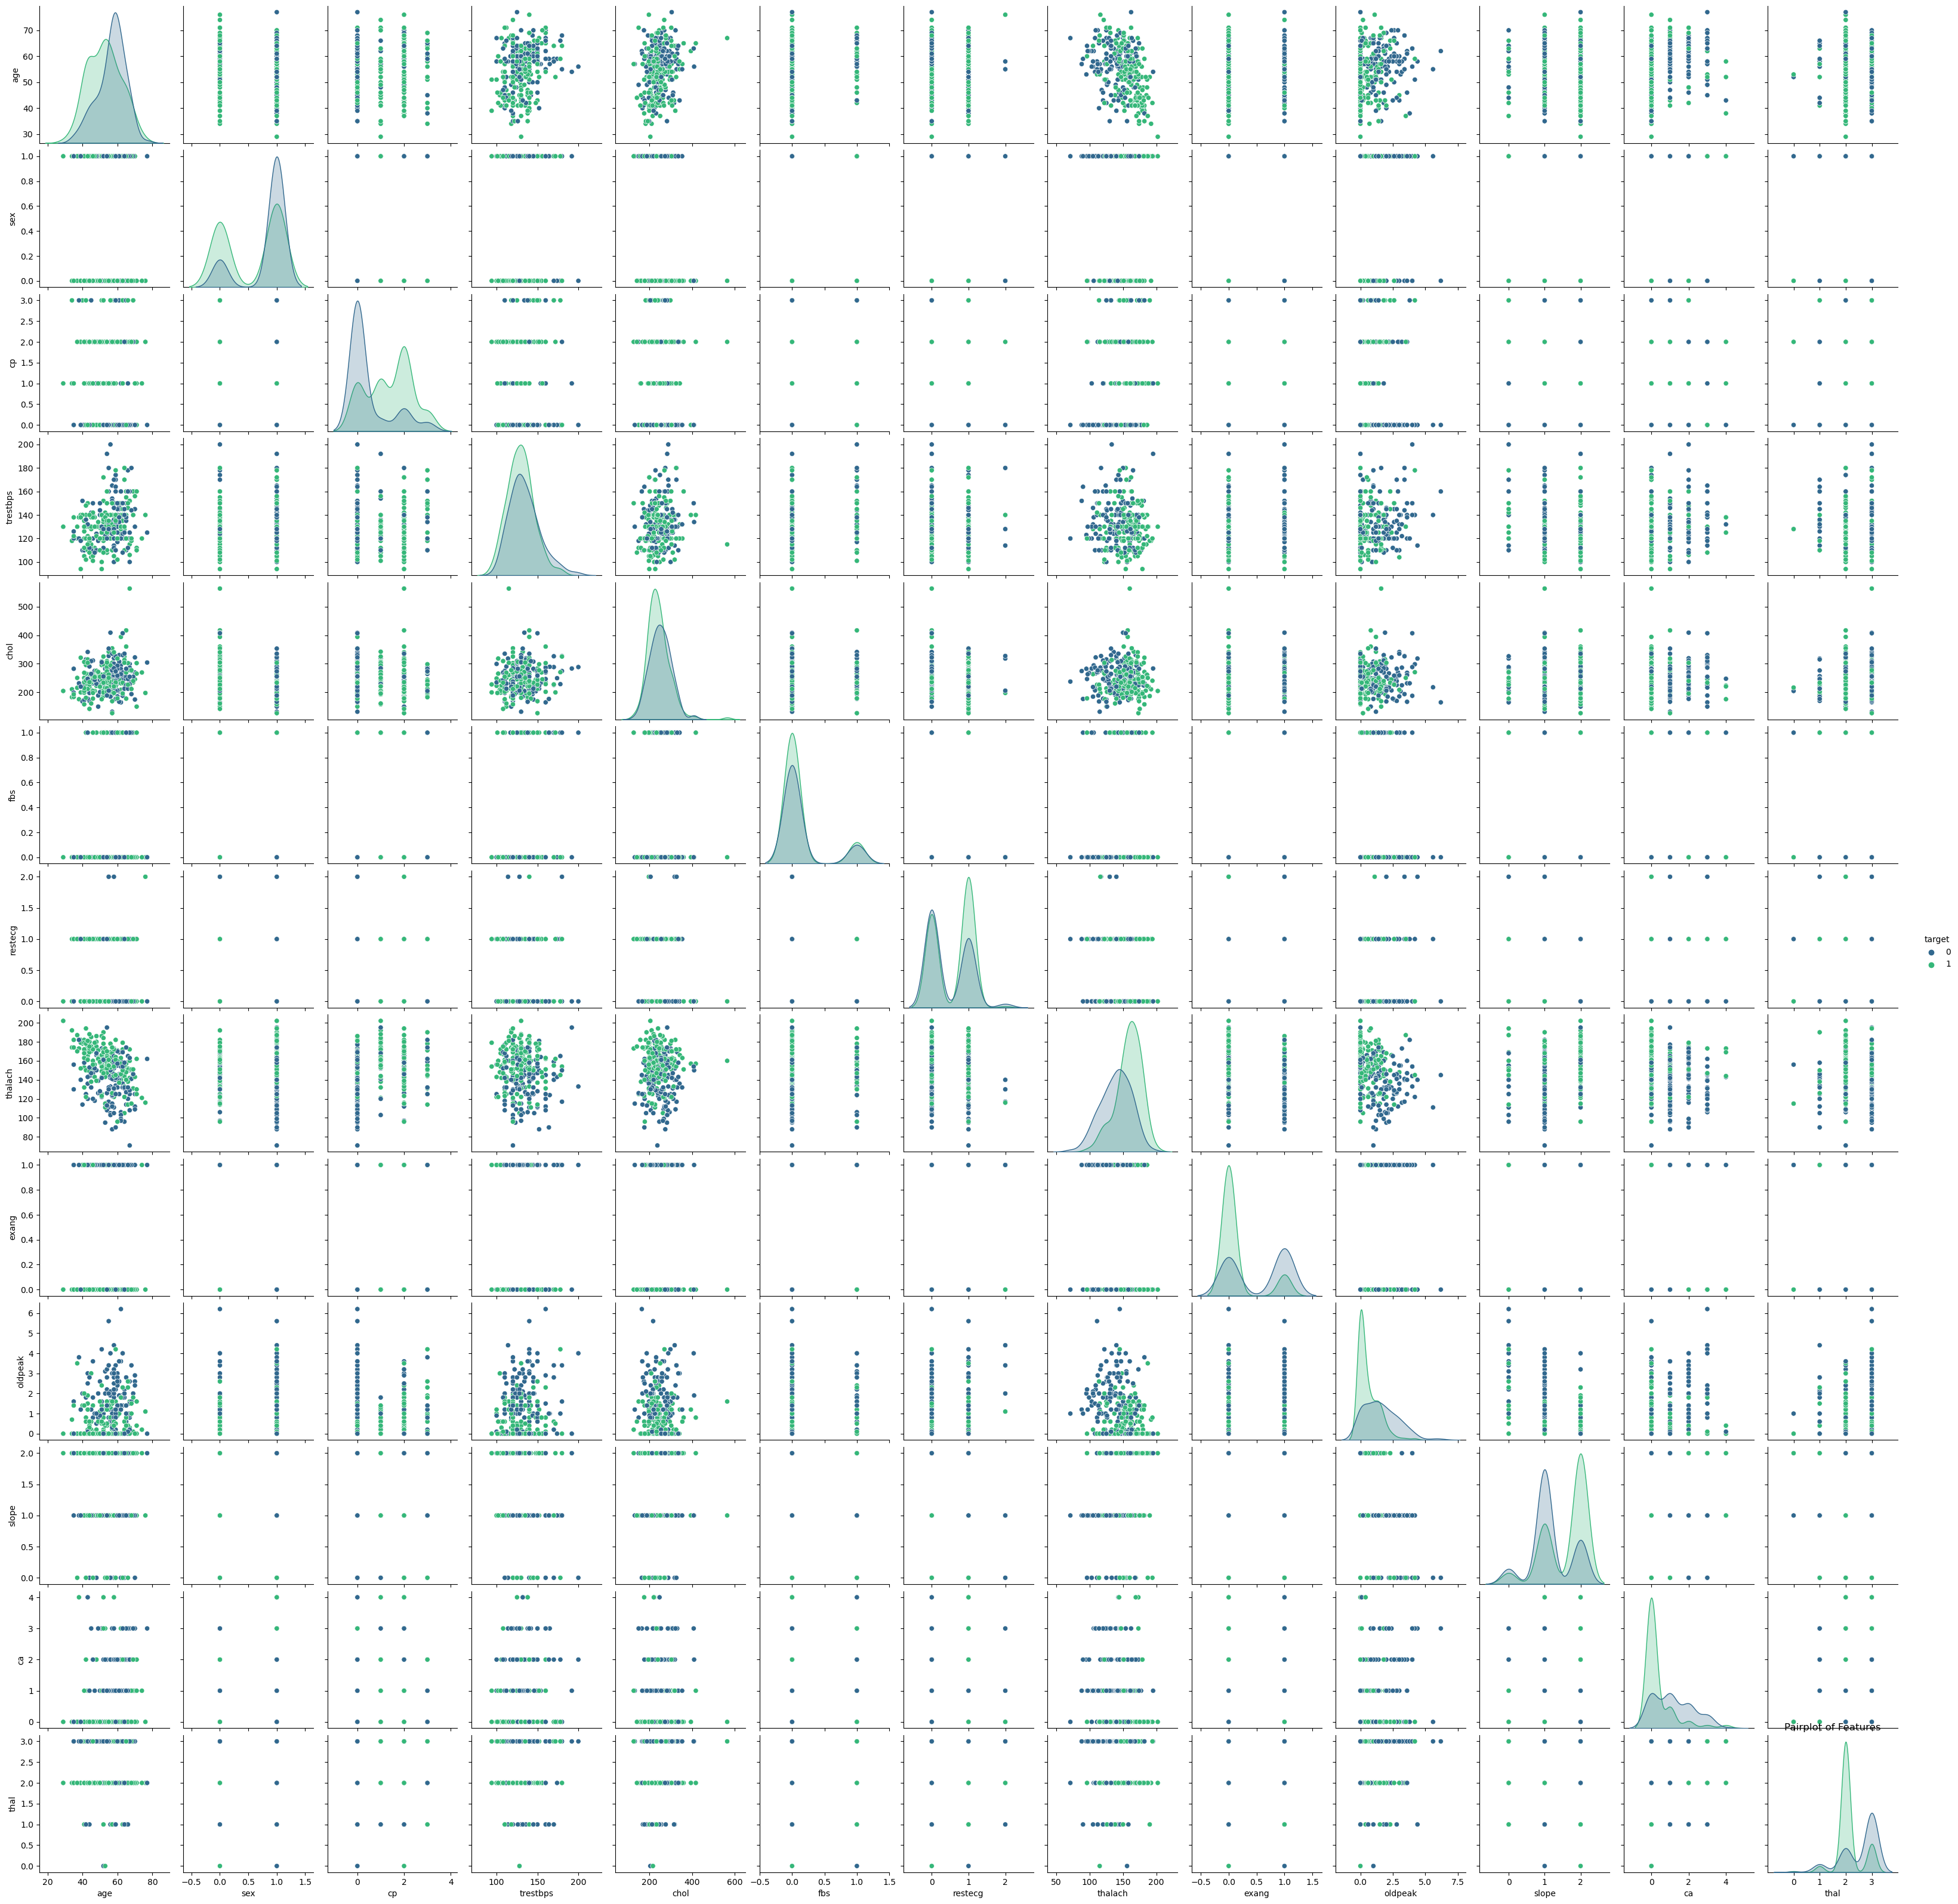

In [24]:
sns.pairplot(heart_disease_clean, hue='target', palette='viridis')
plt.title('Pairplot of Features')
plt.show()

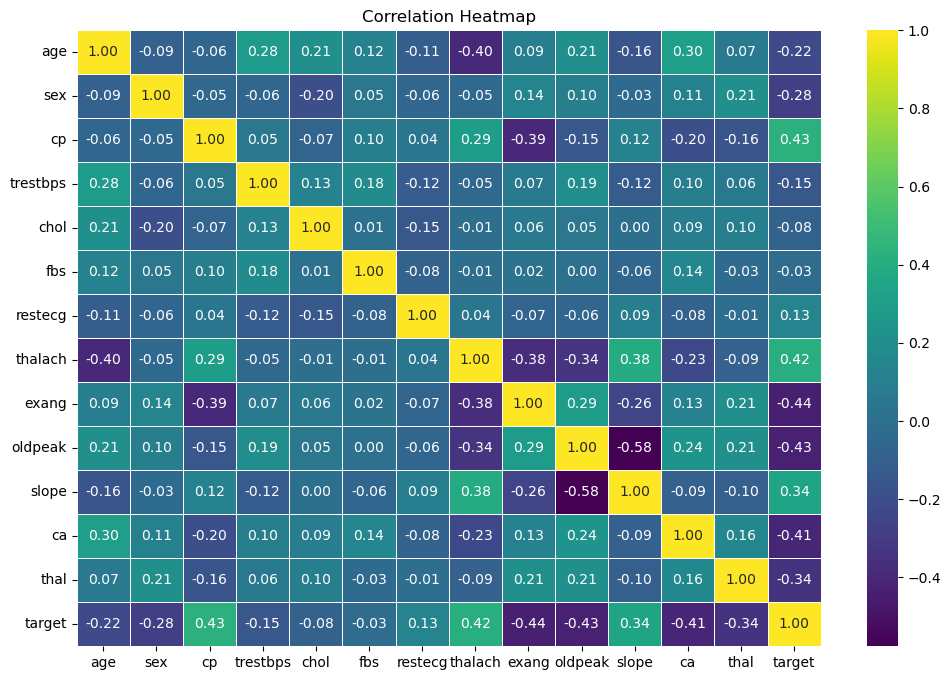

In [25]:
# Select numeric columns
numeric_cols = heart_disease_clean.select_dtypes(include=['int64', 'float64'])

# Generate and plot the correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Heart Disease Diagnostic Analysis Report

#### 1. **Data Overview**

* **Dataset**: `Heart Disease data.csv`
* **Entries**: 1025
* **Columns**: 14

##### Columns Description

* **age**: Age of the patient
* **sex**: Gender of the patient (0 = Female, 1 = Male)
* **cp**: Chest pain type (0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic)
* **trestbps**: Resting blood pressure in mm Hg
* **chol**: Serum cholesterol level in mg/dl
* **fbs**: Fasting blood sugar level (0 = <= 120 mg/dl, 1 = > 120 mg/dl)
* **restecg**: Resting electrocardiogram results (0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy)
* **thalach**: Maximum heart rate achieved
* **exang**: Exercise-induced angina (0 = No, 1 = Yes)
* **oldpeak**: ST depression induced by exercise relative to rest
* **slope**: Slope of the peak exercise ST segment (0 = Upsloping, 1 = Flat, 2 = Downsloping)
* **ca**: Number of major vessels colored by fluoroscopy
* **thal**: Thalassemia status (0 = Normal, 1 = Fixed defect, 2 = Reversible defect)
* **target**: Heart disease diagnosis (0 = No heart disease, 1 = Heart disease)

#### 2. **Data Cleaning**

* **Duplicates**: 723 duplicates found and removed, resulting in 302 unique records.

#### 3. **Exploratory Data Analysis (EDA)**

**Age Distribution**

* **Mean Age**: 54.42 years
* **Median Age**: 55.50 years
* Visualized with a histogram showing the age distribution with mean and median lines.

**Gender Distribution**

* **Male**: 206
* **Female**: 96
* Visualized with a count plot showing gender distribution.

**Heart Disease Diagnosis Distribution**

* **Heart Disease**: 164 cases
* **No Heart Disease**: 138 cases
* Visualized with a pie chart showing the percentage of the population with and without heart disease.

**Age Distribution by Diagnosis**

* Visualized with a box plot, showing that individuals with heart disease tend to be slightly younger than those without.

**Max Heart Rate Analysis**

* **Mean Max Heart Rate (No Heart Disease)**: 139.10
* **Mean Max Heart Rate (Heart Disease)**: 158.38
* Visualized with a box plot showing the distribution of max heart rate by heart disease diagnosis.

**Resting Blood Pressure Distribution**

* **Mean Resting Blood Pressure (No Heart Disease)**: Computed and plotted against the heart disease group to compare.

**Chest Pain Type Analysis**

* Visualized with a count plot showing the distribution of heart disease across different chest pain types.

**Exercise-Induced Angina vs. Max Heart Rate**

* Visualized with a scatter plot to show the relationship between exercise-induced angina and maximum heart rate.

**ST Depression vs. Slope of Peak Exercise ST Segment**

* Visualized with a scatter plot to illustrate the relationship between ST depression and slope of the peak exercise ST segment.

**Correlation Heatmap**

* Generated to show the correlation between different numerical features in the dataset.

#### 4. **Statistical Analysis**

* **Age**
  * Minimum Age: 29
  * Maximum Age: 77
  * Mean Age: 54.42 years
* **Max Heart Rate**
  * Higher mean max heart rate for individuals with heart disease compared to those without.
* **Resting Blood Pressure**
  * Histogram shows different distributions for individuals with and without heart disease.
* **Chest Pain Types**
  * Different chest pain types show varying distributions of heart disease diagnosis.
* **Exercise-Induced Angina**
  * Lower proportion of individuals with exercise-induced angina in the heart disease group compared to the no heart disease group.
* **ST Depression and Slope**
  * Variation in ST depression and slope of peak exercise ST segment between heart disease and no heart disease groups.

#### 5. **Conclusions**

* **Age Distribution**: A wider age range is observed, with a slightly younger mean age for those with heart disease.
* **Gender Distribution**: More males than females are represented in the dataset.
* **Heart Disease Diagnosis**: The data shows a significant proportion of heart disease cases with varied age and clinical features.
* **Feature Relationships**: Significant relationships observed between max heart rate, resting blood pressure, and chest pain types with heart disease diagnosis.
